# skLearn


<a href="https://scikit-learn.org/stable/"> Link to skLearn

In [66]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [3]:
df = sns.load_dataset("iris"); X = df.values[:,:4]

In [11]:
set(df["species"])

{'setosa', 'versicolor', 'virginica'}

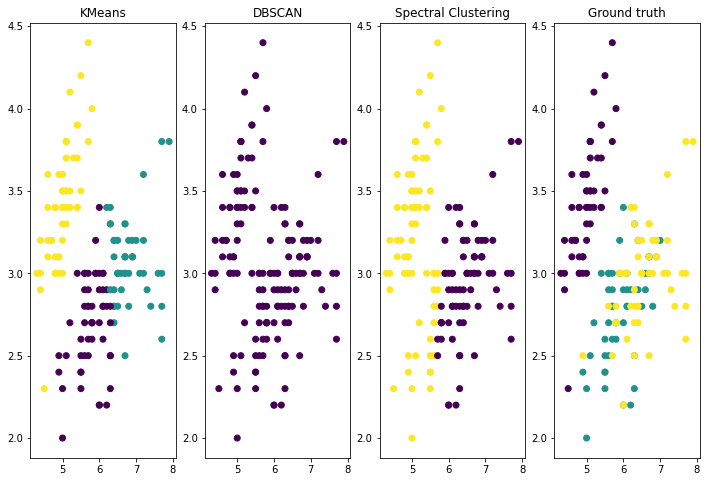

In [12]:
mapper = {'setosa':0,"versicolor":1,"virginica":2}

kmeans = KMeans(n_clusters=3, random_state=3).fit(X)
kmeans.labels_

dbscan = DBSCAN(eps=3, min_samples=2).fit(X)
dbscan.labels_

spectralclustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
spectralclustering.labels_

fig, ax = plt.subplots(1,4, figsize=(12,8))

ax[0].scatter(X[:,0],X[:,1],c=kmeans.labels_)
ax[0].set_title("KMeans")

ax[1].scatter(X[:,0],X[:,1],c=dbscan.labels_)
ax[1].set_title("DBSCAN")

ax[2].scatter(X[:,0],X[:,1],c=spectralclustering.labels_)
ax[2].set_title("Spectral Clustering")

ax[3].scatter(X[:,0],X[:,1],c=df["species"].replace(mapper))
ax[3].set_title("Ground truth");

## Classification

Supervised

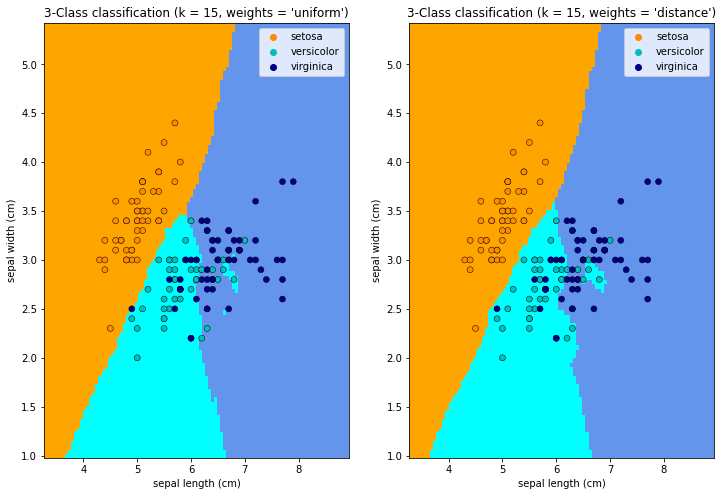

In [25]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
_, ax = plt.subplots(1,2,figsize=(12,8))
for index, weights in enumerate(["uniform", "distance"]):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax[index],
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
        ax = ax[index]
    )
    ax[index].set_title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [32]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

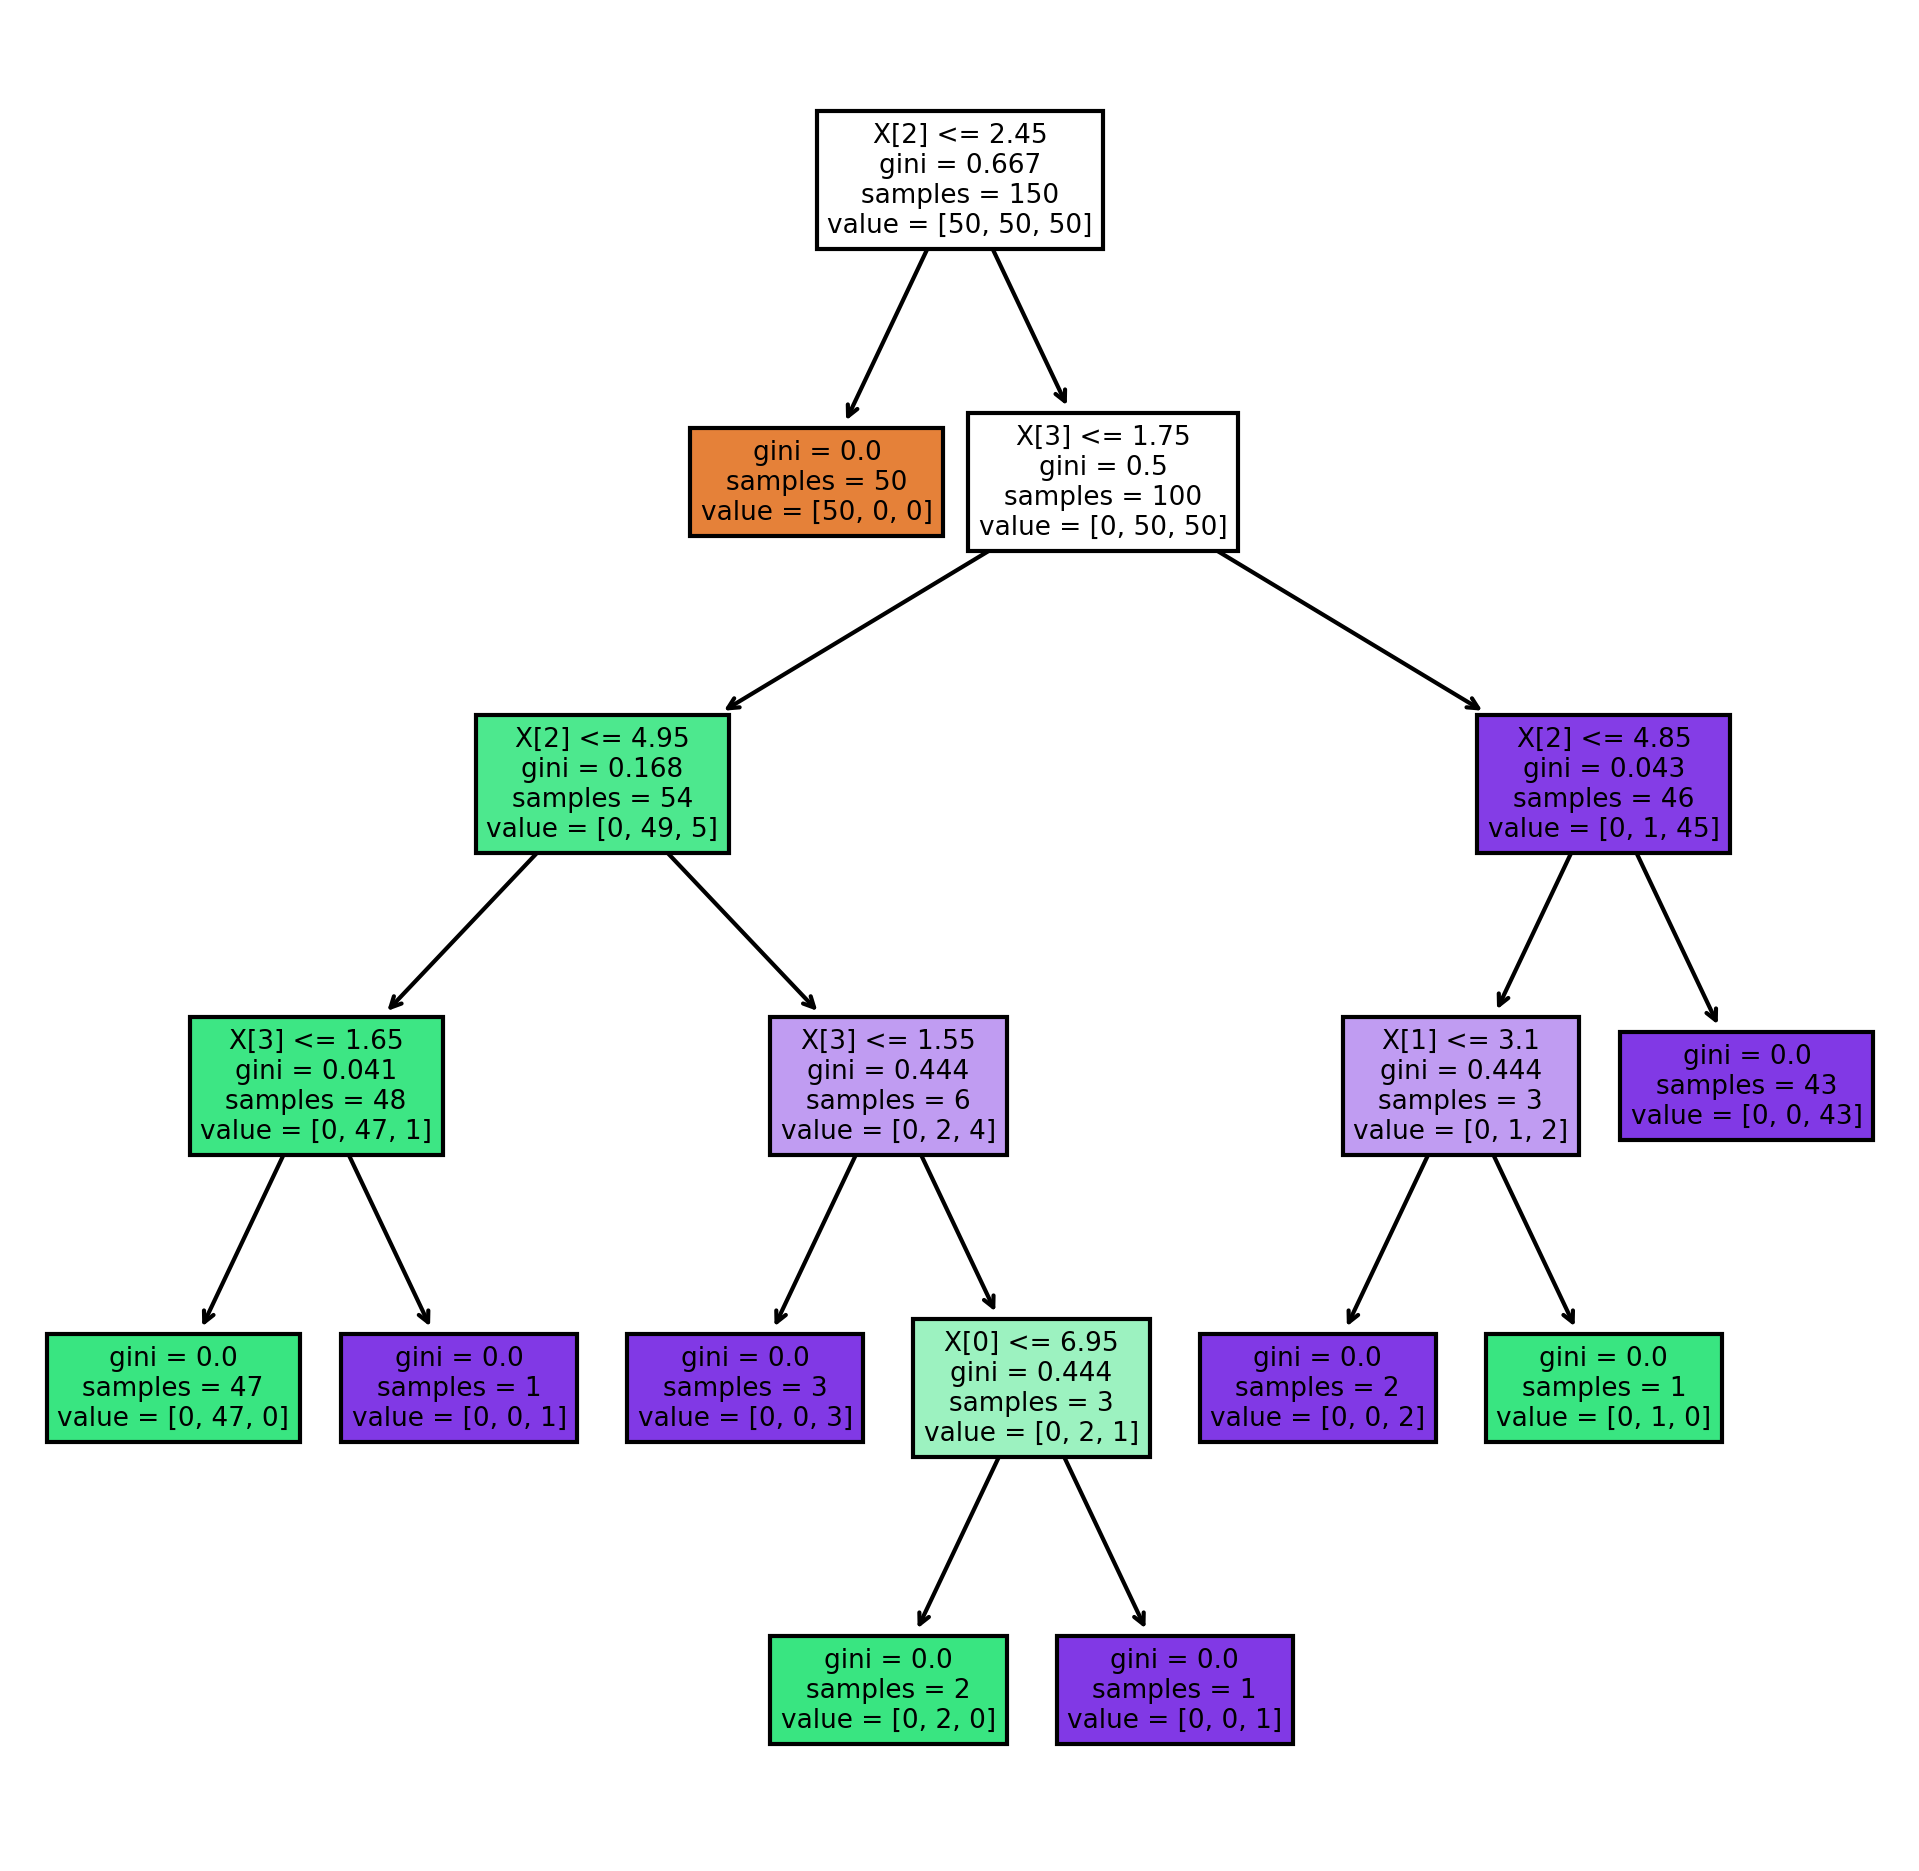

In [51]:
_, ax = plt.subplots(1,1,figsize=(8,8),dpi=300)
tree.plot_tree(clf,ax=ax,filled=True);

In [60]:
clf.predict(np.array([[5,2,4,6],[5,4,4,2]])),clf.predict_proba(np.array([[5,2,4,6],[5,4,4,2]]))

(array([2, 1]),
 array([[0., 0., 1.],
        [0., 1., 0.]]))

## Regression

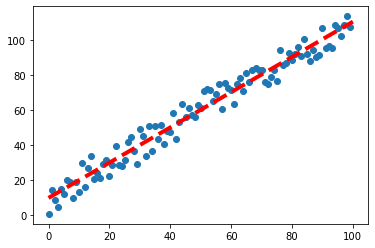

In [116]:
size = 100
x = np.arange(size)
x = np.vstack((x,x)).T
y = np.random.rand(size)*20+x[:,0]

reg = LinearRegression().fit(x, y)

plt.plot(x_plot,2*x_plot*reg.coef_[0]+reg.intercept_,c="r",ls="--",lw=4)
plt.scatter(x[:,0],y);

In [85]:
reg = LinearRegression().fit(x, y)

In [90]:
reg.coef_

array([0.49578795, 0.49578795])

In [88]:
reg.intercept_

9.847918302952792

In [91]:
x_plot = np.linspace(0,100,1000)

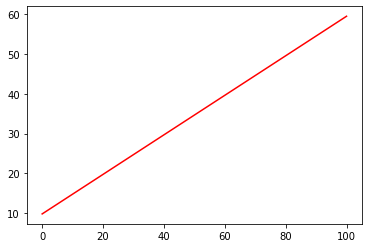

In [96]:
plt.plot(x_plot,x_plot*reg.coef_[0]+reg.intercept_,c="r")